In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import Imputer, LabelBinarizer, StandardScaler
from sklearn.feature_extraction import DictVectorizer
from sklearn.pipeline import Pipeline

%matplotlib inline

### Import and Exploratory Analysis

In [3]:
data = pd.read_csv('./data/train.csv')
pd.options.display.max_columns = 200
data.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [4]:
pd.options.display.max_rows = 1000

In [5]:
# Row x Columns size
data.shape

(1460, 81)

In [6]:
# Check data types 
data.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [8]:
# Calculate common statistical metrics
data.describe().unstack()

Id             count      1460.000000
               mean        730.500000
               std         421.610009
               min           1.000000
               25%         365.750000
               50%         730.500000
               75%        1095.250000
               max        1460.000000
MSSubClass     count      1460.000000
               mean         56.897260
               std          42.300571
               min          20.000000
               25%          20.000000
               50%          50.000000
               75%          70.000000
               max         190.000000
LotFrontage    count      1201.000000
               mean         70.049958
               std          24.284752
               min          21.000000
               25%          59.000000
               50%          69.000000
               75%          80.000000
               max         313.000000
LotArea        count      1460.000000
               mean      10516.828082
            

In [8]:
# Shows columns with object data types
data.select_dtypes(['object']).columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [13]:
# Columns with numeric data types
data.select_dtypes([np.number]).columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

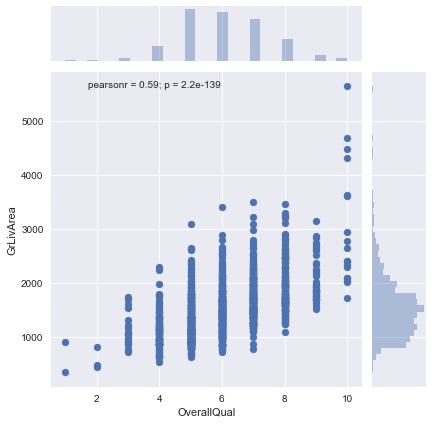

In [16]:
sns.jointplot(x='OverallQual', y='GrLivArea', data=data)

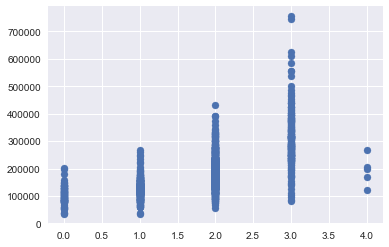

In [22]:
plt.scatter(data['GarageCars'], data['SalePrice'])

### Data Cleaning

#### Cleaning notes
Will need to more carefully examine columns based on their meanings
Id - column should be removed as it has no meaning for the housing price
MSSubclass - column has value but is not directly numerical
    this is related to the `BldgType` and `HouseStyle`

Dropping `Id` and `MSSubclass`

In [9]:
data_dropped = data.drop(['Id', 'MSSubClass', 'SalePrice'], axis=1)
y = data['SalePrice']

In [69]:
def clean_data(X):
    # split data into numeric and categorical types
    categorical_data = X.select_dtypes(['object'])
    numeric_data = X.select_dtypes([np.number])
    
    # Impute median for missing values on numeric types
    imputer = Imputer(strategy='median')
    imputed = imputer.fit_transform(numeric_data)
    imputed_data = pd.DataFrame(imputed, columns=numeric_data.columns)
    
    # Standardize numeric data
#     scaler = StandardScaler()
#     scaled_numeric_data = pd.DataFrame(scaler.fit_transform(imputed_data), columns=imputed_data.columns)
    
    # One hot encode categorical data
    categories_hotencoded = pd.get_dummies(categorical_data)
    
    # Merge data and return
#     return pd.concat([scaled_numeric_data, categories_hotencoded], axis=1)
    return pd.concat([imputed_data, categories_hotencoded], axis=1)

In [70]:
X = clean_data(data_dropped)
X.head(3)

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,...,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,0.0,150.0,856.0,856.0,854.0,0.0,1710.0,1.0,0.0,2.0,1.0,3.0,1.0,8.0,0.0,2003.0,2.0,548.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,0.0,284.0,1262.0,1262.0,0.0,0.0,1262.0,0.0,1.0,2.0,0.0,3.0,1.0,6.0,1.0,1976.0,2.0,460.0,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,...,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0

In [42]:
print('Features shape: {}'.format(X.shape))
print('Labels shape: {}'.format(y.shape))

Features shape: (1460, 287)
Labels shape: (1460,)


### Visualization

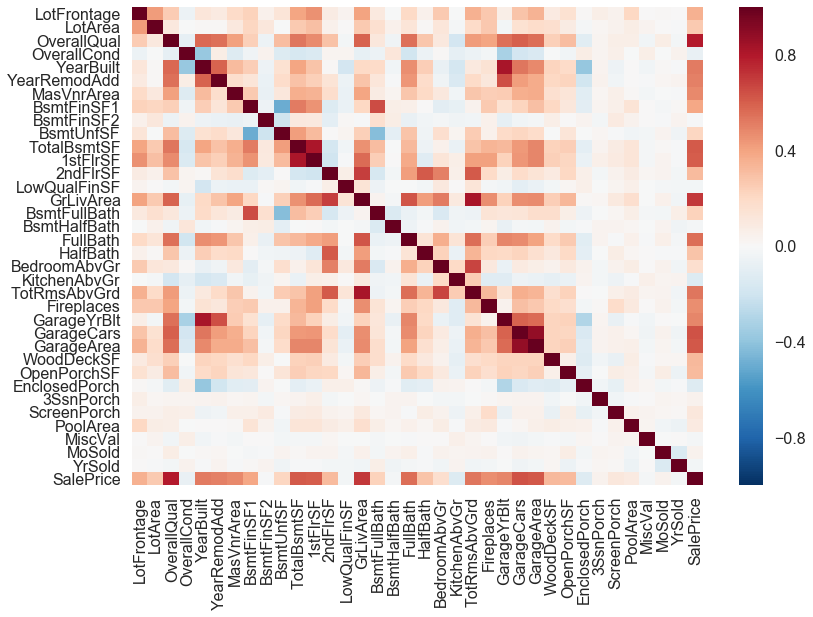

In [43]:
numeric_corr = data.drop(['Id', 'MSSubClass'], axis=1).select_dtypes([np.number]).corr()
sns.set_context('poster')
sns.heatmap(numeric_corr)

In [172]:
Xy = pd.concat([X,y], axis=1)
Xy_corr = Xy.corr()
sortedXy = Xy_corr['SalePrice'].sort_values(ascending=False)
high_corr = sortedXy[(0.05 < sortedXy) | (sortedXy < -0.05)].dropna()
high_corr = high_corr.drop(['SalePrice'])
high_corr.index

X_hat = X[high_corr.index.get_values()]
X_hat.shape

(1460, 177)

In [44]:
# Sorted Correlation values for SalePrice
saleprice_corr = numeric_corr['SalePrice']
saleprice_corr.sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

### Training

In [173]:
# Split up the data
X_train, X_test, y_train, y_test = train_test_split(X_hat, y, test_size=0.30)
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Prediction

In [174]:
y_predict = linear_model.predict(X_test)

In [175]:
y_df = pd.DataFrame(y_predict)
y_df[y_df < 0].dropna()
## 55, 349
# X.loc[349]

,0


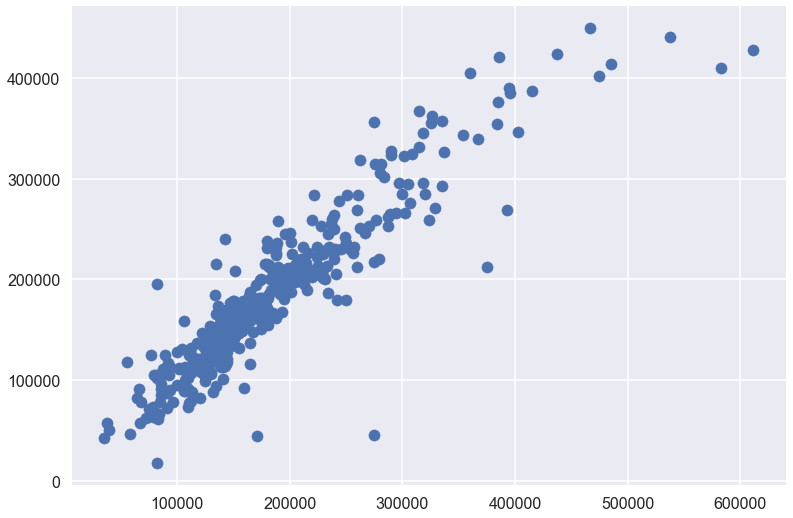

In [176]:
plt.scatter(y_test, y_predict)

In [177]:
r2 = r2_score(y_test, y_predict)
r2

0.84387819157657507

C:\Users\joshua.deleon\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


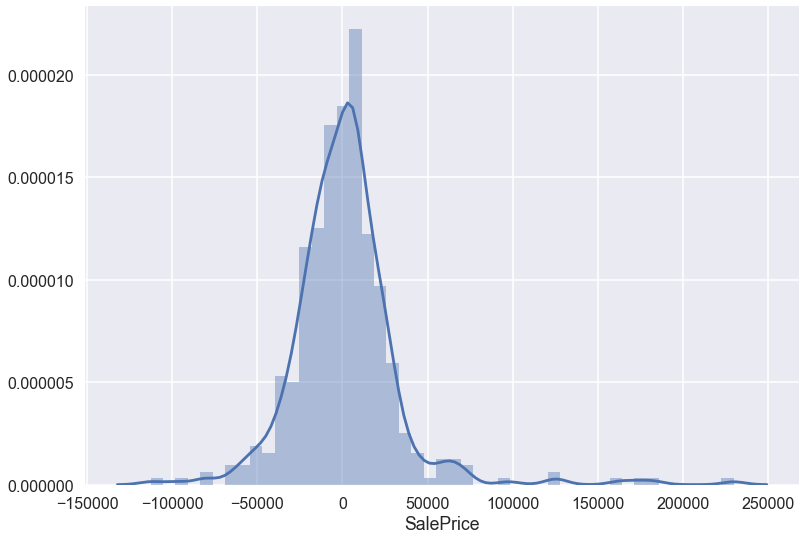

In [178]:
sns.distplot(y_test - y_predict)

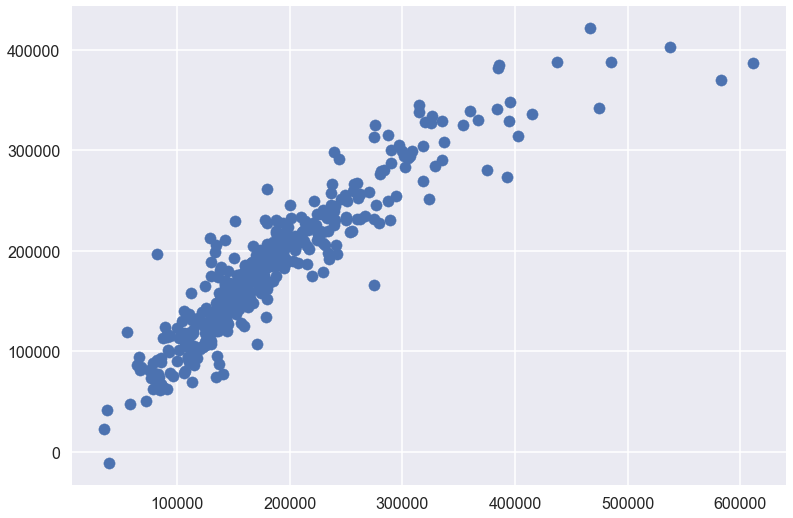

In [197]:
from sklearn.linear_model import Lasso
lm = Lasso(alpha=1000)
lm.fit(X_train, y_train)
yhat = lm.predict(X_test)
plt.scatter(y_test, yhat)

In [198]:
r2 = r2_score(y_test, yhat)
r2

0.8478638321389087

In [199]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lm, X_hat, y, cv=10)
scores

C:\Users\joshua.deleon\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\joshua.deleon\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\joshua.deleon\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\joshua.deleon\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not co

array([ 0.878215  ,  0.87765667,  0.91807717,  0.73941782,  0.84933993,
        0.85290148,  0.85418311,  0.86757448,  0.48689416,  0.87001163])

In [222]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X_hat)
poly_model = LinearRegression()
poly_model.fit(X_poly, y)

# y_poly = poly_model.predict(X_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

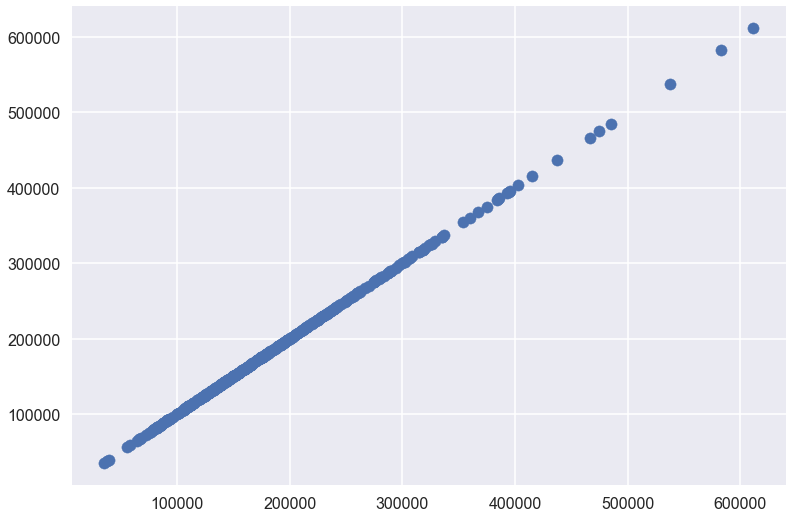

In [223]:
X_test_poly = poly_features.fit_transform(X_test)
y_poly = poly_model.predict(X_test_poly)
plt.scatter(y_test, y_poly)

In [231]:
poly_model.score(X_poly, y)

0.99999694556137886

### Cross Validation

In [190]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(linear_model, X_hat, y, cv=10)
scores

array([ 0.90654624,  0.82965455,  0.86768575,  0.78013548,  0.8847703 ,
        0.88131342,  0.86085192,  0.87240855,  0.58897469,  0.83652299])

### Kaggle Test set 

In [232]:
test = pd.read_csv('./data/test.csv')


In [28]:
test.shape

(1459, 80)

In [247]:
# Clean test data
test_cleaned = clean_data(test)
test_cleaned = test_cleaned[high_corr.index.get_values()]

# Transform to polynomial features
test_cleaned = poly_features.fit_transform(test_cleaned)
test_cleaned.shape

(1459, 15930)

In [249]:
# predict 
y_test_predict = poly_model.predict(test_cleaned)
pd.DataFrame(y_test_predict).head()

,0
0,28174.583581
1,-11524.180222
2,130382.846795
3,100253.958685
4,169048.851735


In [240]:
id_start = 1461

In [241]:
ids = pd.DataFrame(np.array(range(id_start, len(y_test_predict) + id_start)), index=range(0, len(y_test_predict)), columns=['Id'])
ids.head()

,Id
0,1461
1,1462
2,1463
3,1464
4,1465


In [242]:
test_df = pd.DataFrame(data=y_test_predict, index=range(0,len(y_test_predict)), columns=['SalePrice'])
test_df.head()

,SalePrice
0,28174.583581
1,-11524.180222
2,130382.846795
3,100253.958685
4,169048.851735


In [245]:
submission = pd.concat([ids, test_df], axis=1)
submission.tail()

,Id,SalePrice
1454,2915,142582.442373
1455,2916,185998.947958
1456,2917,206710.150111
1457,2918,249660.816431
1458,2919,100535.442624


In [246]:
submission[submission['SalePrice'] < 0].dropna()

,Id,SalePrice
1,1462,-1.152418e+04
12,1473,-2.018919e+04
31,1492,-9.560116e+04
53,1514,-6.546920e+04
69,1530,-7.764091e+04
75,1536,-1.045623e+05
76,1537,-2.456185e+05
89,1550,-2.326480e+04
91,1552,-1.323678e+05
96,1557,-1.023022e+05


In [ ]:
# submission.to_csv('./data/submission.csv', index=False)